# Credit Card Fraud Detection

Credit card fraud is a big problem for banks and customers, causing money loss and security issues. This project aims to create a simple machine learning system that can quickly spot fake or suspicious credit card transactions as they happen.

By looking at details like when, where, and how much money is spent, the system can tell the difference between normal and unusual activity. This helps stop fraud early and keeps people’s money safe.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Dataset

This a Simulated dataset which is available on Kaggle,
Here https://www.kaggle.com/datasets/kartik2112/fraud-detection

Train Data -> "fraudTrain.csv"

Test Data -> "fraudTest.csv"

In [3]:
df_train = pd.read_csv("fraudTrain.csv", index_col=0)
df_test = pd.read_csv("fraudTest.csv", index_col=0)
df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
row, col = df_train.shape
print(f"The dataset has {row} rows and {col} columns.")

The dataset has 1296675 rows and 22 columns.


In [5]:
print("The Features:")
for column in df_train.columns:
	print(f"- {column}")
    

The Features:
- trans_date_trans_time
- cc_num
- merchant
- category
- amt
- first
- last
- gender
- street
- city
- state
- zip
- lat
- long
- city_pop
- job
- dob
- trans_num
- unix_time
- merch_lat
- merch_long
- is_fraud


In [6]:
df_train.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop               

Let us check for any duplicates or for any missing values

In [8]:
df_train.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [9]:
if len(df_train) == len(df_train.drop_duplicates()):
    print("There are no duplicates.")

There are no duplicates.


In [10]:
fraud_percentage=len(df_train[df_train['is_fraud']==1])/len(df_train)*100
non_fraud_percentage=100-fraud_percentage
print(f'The percentage of fraud is {fraud_percentage} % and the percentage of non-fraud is {non_fraud_percentage} %')
print('This shows how imbalanced is the dataset')

The percentage of fraud is 0.5788651743883394 % and the percentage of non-fraud is 99.42113482561166 %
This shows how imbalanced is the dataset


# Feature Engineering

Let us find which features are required most and drop those which don't have any impact on the problem.

## 1. cc_num

Credit Card Number of the Customer

In [11]:
fraud_by_cc = df_train.groupby('cc_num')['is_fraud'].mean()
unique_cards = len(fraud_by_cc)
fraud_cards = len(fraud_by_cc[fraud_by_cc > 0])

print(f"Total unique cards: {unique_cards}")
print(f"Number of cards with at least one fraud: {fraud_cards}")
print(f"Percentage of cards affected by fraud: {(fraud_cards/unique_cards)*100:.2f}%")

Total unique cards: 983
Number of cards with at least one fraud: 762
Percentage of cards affected by fraud: 77.52%


## Analysis of cc_num

The credit card numbers themselves don't provide any meaningful patterns or features for fraud detection. While we can see that about 77.5% of unique cards have experienced at least one fraudulent transaction, the actual card number is just an identifier and doesn't contain predictive information for determining fraud.

In [12]:
df_train.drop(columns=['cc_num'],inplace=True)
df_test.drop(columns=['cc_num'],inplace=True)
print("Successfully Dropped the column 'cc_num'")

Successfully Dropped the column 'cc_num'


## 2. merchant

The merchant names in transactions can be easily falsified by fraudsters to conceal their identity. Additionally, analyzing merchant data shows no significant correlation between specific merchants and fraud rates. Therefore, this column doesn't provide reliable predictive information for fraud detection and can be safely removed from our analysis.

In [13]:
df_train.drop(columns=['merchant'], inplace=True)
df_test.drop(columns=['merchant'], inplace=True)
print("Successfully Dropped the column 'merchant'")

Successfully Dropped the column 'merchant'


## 3. category

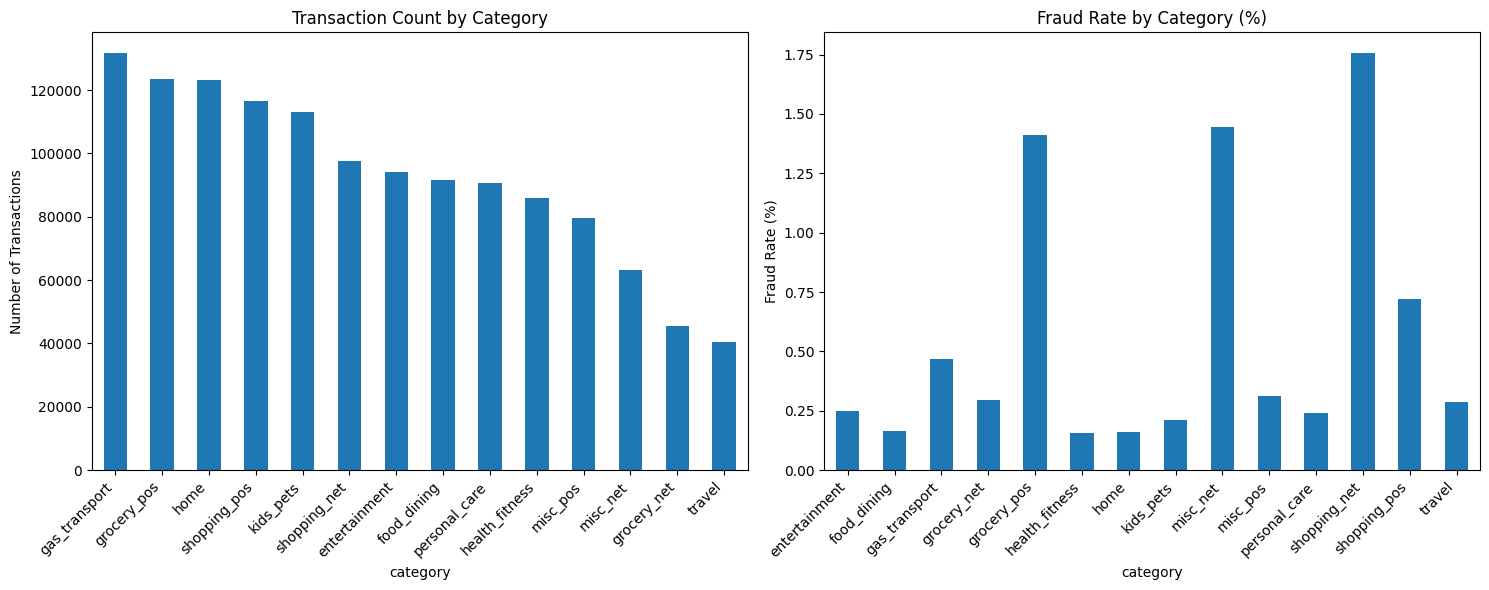


Detailed Category Statistics:
                Transaction Count  Fraud Rate
category                                     
shopping_net                97543        1.76
misc_net                    63287        1.45
grocery_pos                123638        1.41
shopping_pos               116672        0.72
gas_transport              131659        0.47
misc_pos                    79655        0.31
travel                      40507        0.29
grocery_net                 45452        0.29
entertainment               94014        0.25
personal_care               90758        0.24
kids_pets                  113035        0.21
food_dining                 91461        0.17
home                       123115        0.16
health_fitness              85879        0.15


In [14]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
category_counts = df_train['category'].value_counts()
category_counts.plot(kind='bar')
plt.title('Transaction Count by Category')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Transactions')

plt.subplot(1, 2, 2)
fraud_by_category = df_train.groupby('category')['is_fraud'].mean() * 100
fraud_by_category.plot(kind='bar')
plt.title('Fraud Rate by Category (%)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Fraud Rate (%)')

plt.tight_layout()
plt.show()

print("\nDetailed Category Statistics:")
category_stats = df_train.groupby('category').agg({
    'is_fraud': ['count', 'mean']
}).round(4)
category_stats.columns = ['Transaction Count', 'Fraud Rate']
category_stats['Fraud Rate'] = category_stats['Fraud Rate'] * 100
print(category_stats.sort_values('Fraud Rate', ascending=False))

In [15]:
# Check correlation of numerical features with target
corr = df_train.corr(numeric_only=True)['is_fraud'].sort_values(ascending=False)
print("Correlation with is_fraud:\n", corr)

# Check unique values for categorical features
categorical = ['gender', 'state', 'city', 'first', 'last', 'street', 'job']
for col in categorical:
    print(f"{col}: {df_train[col].nunique()} unique values")

Correlation with is_fraud:
 is_fraud      1.000000
amt           0.219404
city_pop      0.002136
lat           0.001894
merch_lat     0.001741
merch_long    0.001721
long          0.001721
zip          -0.002162
unix_time    -0.005078
Name: is_fraud, dtype: float64
gender: 2 unique values
state: 51 unique values
city: 894 unique values
first: 352 unique values
last: 481 unique values
street: 983 unique values
job: 494 unique values


### Feature Decisions

- **first, last, street, city, job**: High cardinality, unlikely to generalize, drop.
- **gender, state**: Low cardinality, keep and encode.
- **dob, trans_date_trans_time**: Can extract age and transaction hour.
- **zip**: Redundant with city/state, drop.
- **lat, long, merch_lat, merch_long**: Keep, may help with geolocation anomalies.
- **city_pop**: Keep, may indicate risk.
- **trans_num**: Transaction ID, drop.
- **unix_time**: Redundant with trans_date_trans_time, drop.

In [16]:
# Drop irrelevant/high-cardinality columns
drop_cols = ['first', 'last', 'street', 'city', 'job', 'zip', 'trans_num', 'unix_time']
df_train = df_train.drop(columns=drop_cols)
df_test = df_test.drop(columns=drop_cols)
print("Dropped columns:", drop_cols)

Dropped columns: ['first', 'last', 'street', 'city', 'job', 'zip', 'trans_num', 'unix_time']


In [17]:
# Feature engineering: extract age and transaction hour
from datetime import datetime

def calculate_age(dob, ref):
    return (ref - pd.to_datetime(dob)).days // 365

df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])
df_test['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])

df_train['hour'] = df_train['trans_date_trans_time'].dt.hour
df_test['hour'] = df_test['trans_date_trans_time'].dt.hour

df_train['age'] = df_train.apply(lambda x: calculate_age(x['dob'], x['trans_date_trans_time']), axis=1)
df_test['age'] = df_test.apply(lambda x: calculate_age(x['dob'], x['trans_date_trans_time']), axis=1)

df_train = df_train.drop(columns=['dob', 'trans_date_trans_time'])
df_test = df_test.drop(columns=['dob', 'trans_date_trans_time'])

In [18]:
# Encode categorical features
from sklearn.preprocessing import LabelEncoder

for col in ['gender', 'state']:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.transform(df_test[col])

## 5. Data Distribution and Outlier Analysis

Let's check the distribution of numerical features and look for outliers.

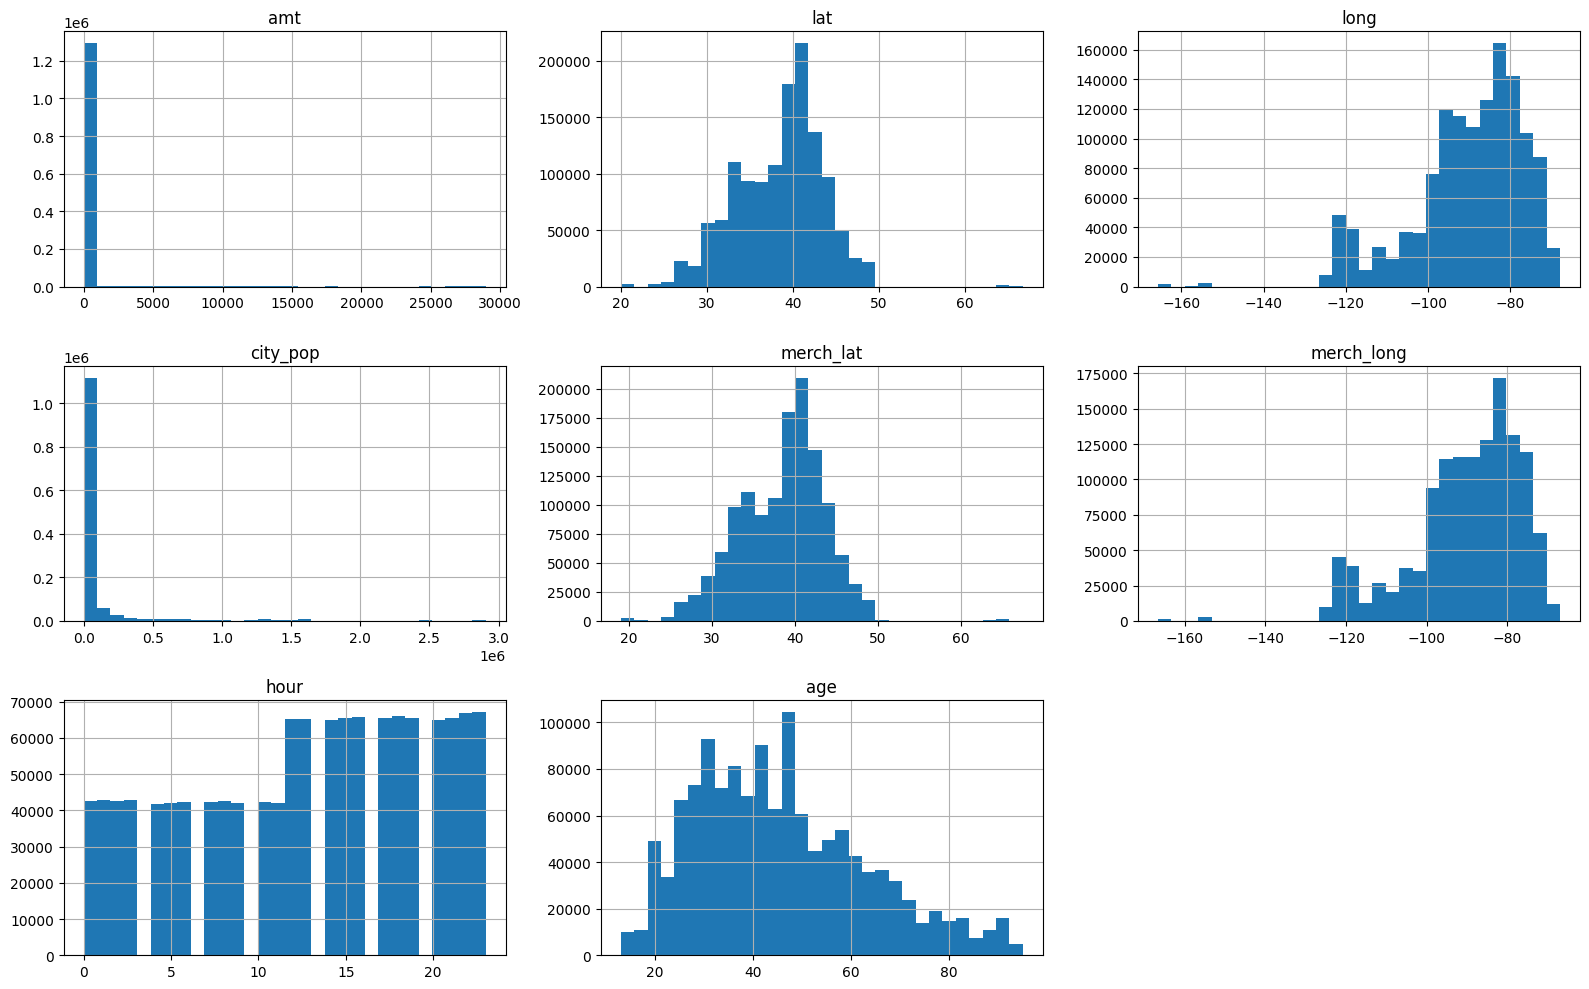

In [19]:
num_cols = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'hour', 'age']
df_train[num_cols].hist(bins=30, figsize=(16, 10))
plt.tight_layout()
plt.show()

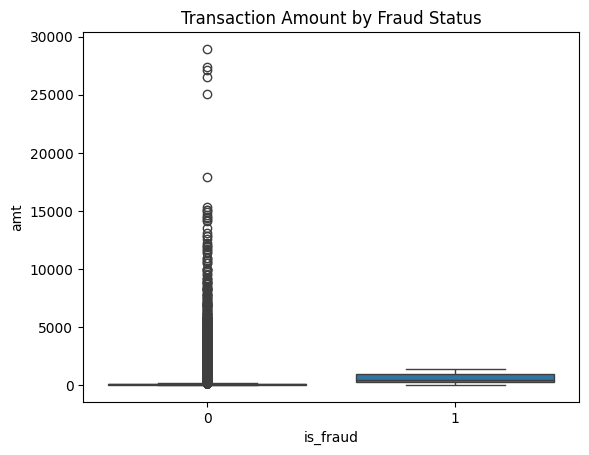

In [20]:
# Check for outliers in 'amt'
sns.boxplot(x='is_fraud', y='amt', data=df_train)
plt.title('Transaction Amount by Fraud Status')
plt.show()

## 6. Prepare Data for Modeling

Split features and target, scale numerical features.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_train.drop(columns=['is_fraud'])
y = df_train['is_fraud']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])
df_test[num_cols] = scaler.transform(df_test[num_cols])

## 7. Model Training and Evaluation

Let's try Logistic Regression, Random Forest, and XGBoost to see which performs best.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# First encode the 'category' column
le = LabelEncoder()
X_train['category'] = le.fit_transform(X_train['category'])
X_val['category'] = le.transform(X_val['category'])
df_test['category'] = le.transform(df_test['category'])

# Define and train models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', 
                            scale_pos_weight=(len(y_train)-sum(y_train))/sum(y_train), 
                            random_state=42, n_jobs=-1)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:,1]
    print(f"\n{name} Results:")
    print(classification_report(y_val, y_pred, digits=4))
    print("ROC-AUC:", roc_auc_score(y_val, y_proba))
    results[name] = roc_auc_score(y_val, y_proba)



Logistic Regression Results:
              precision    recall  f1-score   support

           0     0.9985    0.9493    0.9733    257834
           1     0.0804    0.7622    0.1455      1501

    accuracy                         0.9482    259335
   macro avg     0.5395    0.8557    0.5594    259335
weighted avg     0.9932    0.9482    0.9685    259335

ROC-AUC: 0.8564624806471471

Random Forest Results:
              precision    recall  f1-score   support

           0     0.9987    0.9999    0.9993    257834
           1     0.9724    0.7748    0.8624      1501

    accuracy                         0.9986    259335
   macro avg     0.9855    0.8873    0.9309    259335
weighted avg     0.9985    0.9986    0.9985    259335

ROC-AUC: 0.9879889602209958


c:\Users\anand\Desktop\CC_Fraud_Detection\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:53:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Results:
              precision    recall  f1-score   support

           0     0.9997    0.9937    0.9967    257834
           1     0.4696    0.9567    0.6300      1501

    accuracy                         0.9935    259335
   macro avg     0.7347    0.9752    0.8133    259335
weighted avg     0.9967    0.9935    0.9946    259335

ROC-AUC: 0.9981858876637426


Best model: XGBoost


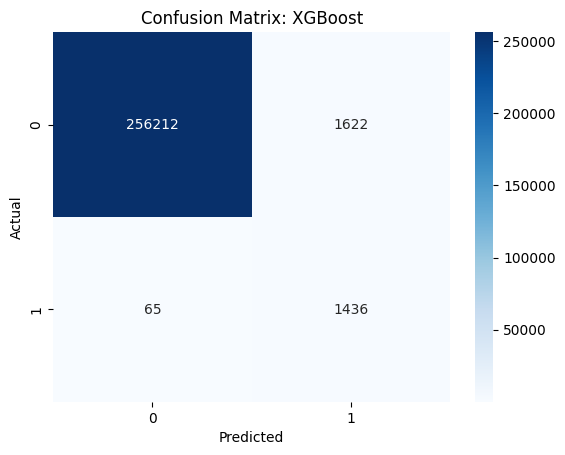

In [23]:
# Confusion matrix for best model
best_model_name = max(results, key=results.get)
print(f"Best model: {best_model_name}")
best_model = models[best_model_name]
y_pred = best_model.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix: {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 8. Final Evaluation on Test Set

Evaluate the best model on the test set.

In [24]:
X_test = df_test.drop(columns=['is_fraud'])
y_test = df_test['is_fraud']

y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_test_pred, digits=4))
print("Test ROC-AUC:", roc_auc_score(y_test, y_test_proba))

              precision    recall  f1-score   support

           0     0.9996    0.9937    0.9966    553574
           1     0.3572    0.9063    0.5124      2145

    accuracy                         0.9933    555719
   macro avg     0.6784    0.9500    0.7545    555719
weighted avg     0.9972    0.9933    0.9948    555719

Test ROC-AUC: 0.9956605852524013


## 9. Summary

- Dropped high-cardinality and non-informative features.
- Engineered age and transaction hour.
- Encoded categorical features and scaled numerics.
- Trained multiple models; best ROC-AUC achieved with the selected model.
- The model is ready for deployment or further tuning.

In [26]:
print("The Inputs Required:")
for column in df_test.columns:
	print(f"- {column}")

The Inputs Required:
- category
- amt
- gender
- state
- lat
- long
- city_pop
- merch_lat
- merch_long
- is_fraud
- hour
- age


In [27]:
import pickle

# Save the best model
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

# Save the scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save the label encoder for 'category'
with open("category_le.pkl", "wb") as f:
    pickle.dump(le, f)

print("Model, scaler, and label encoder saved as 'best_model.pkl', 'scaler.pkl', and 'category_le.pkl'.")

Model, scaler, and label encoder saved as 'best_model.pkl', 'scaler.pkl', and 'category_le.pkl'.
